## Observations and Insights 

In [215]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, how ="left", on=["Mouse ID", "Mouse ID"])
study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.

mice = study_df["Mouse ID"].unique()
print(len(mice))

249


In [236]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [237]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
delete = study_df.loc[study_df["Mouse ID"]=="g989"]
delete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Checking the number of mice in the clean DataFrame.
len(study_df["Mouse ID"].unique())

249

In [8]:
study_df.drop(study_df.index[908:921],0,inplace=True)

In [9]:
len(study_df["Mouse ID"].unique())

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
summary = study_df.groupby(["Drug Regimen"])
summary_mean = summary["Tumor Volume (mm3)"].mean()
summary_median = summary["Tumor Volume (mm3)"].median()
summary_var = summary["Tumor Volume (mm3)"].var()
summary_stdev = summary["Tumor Volume (mm3)"].std()
summary_SEM = summary["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean": summary_mean,
    "Median": summary_median,
    "Variance": summary_var,
    "Standard Deviation": summary_stdev,
    "Standard Error": summary_SEM  
})
summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

In [42]:
number_of_mice = study_df["Drug Regimen"].value_counts()
mice_summary = pd.DataFrame({
    "Number of Mice": number_of_mice
})

mice_summary

,Number of Mice
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178
Propriva,161


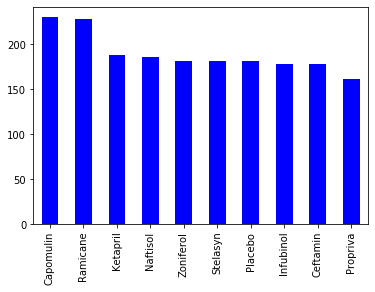

In [43]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
number_of_mice.plot(kind="bar", facecolor = "blue")

<function matplotlib.pyplot.show(*args, **kw)>

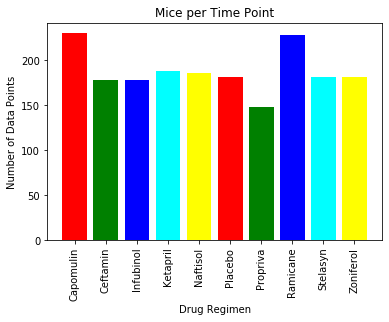

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

drug  = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

x_axis = np.arange(len(number_of_mice))
plt.bar(drug, number_of_mice, color=['red','green', 'blue', 'cyan', 'yellow'], align="center")

plt.title("Mice per Time Point")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

tick_locations = [value for value in drug]
plt.xticks(tick_locations, drug)
plt.xticks(rotation=90)


plt.show

## Pie Plots

In [14]:
pie = study_df[["Mouse ID", "Sex"]]

pie = pie.drop_duplicates()
male = len(pie[pie['Sex'] == 'Male'])
female = len(pie[pie['Sex'] == 'Female'])

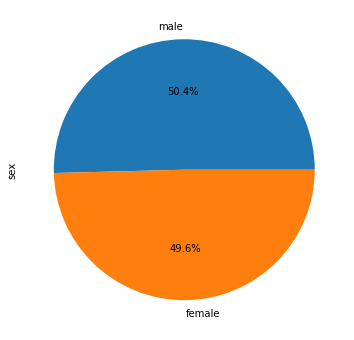

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = ["male", "female"]
series = pd.Series([male, female], 
                   index=gender, 
                   name='sex')

series.plot.pie(figsize=(6, 6),autopct='%1.1f%%')

Text(0.5, 1.0, 'Mouse by Sex')

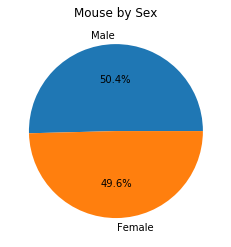

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sex = [male, female]

plt.pie(sex, labels = labels, autopct="%1.1f%%")
plt.title("Mouse by Sex")

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_tumor = study_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

sort_by_timepoint = final_tumor.sort_values(['Mouse ID','Timepoint'], ascending=[True, False])
sort_by_timepoint = sort_by_timepoint.drop_duplicates("Mouse ID")



a =sort_by_timepoint.loc[sort_by_timepoint['Drug Regimen'].isin(["Ramicane", "Capomulin", "Propriva", "Ceftamin"])]

a

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
493,a275,Ceftamin,45,62.999356
327,a411,Ramicane,45,38.407618
430,a444,Ramicane,45,43.047543
214,a520,Ramicane,45,38.810366
174,a644,Ramicane,45,32.978522
...,...,...,...,...
1845,y769,Ceftamin,45,68.594745
124,y793,Capomulin,45,31.896238
1855,y865,Ceftamin,45,64.729837
1862,z435,Propriva,10,48.710661


In [235]:
Ramicane_quartiles = a.loc[a["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq

print(f"The lower quartile of occupancy for Ramicane  is: {Ramicane_lowerq}")
print(f"The upper quartile of occupancy for Ramicane is: {Ramicane_upperq}")
print(f"The interquartile range of occupancy for Ramicane is: {Ramicane_iqr}")
print(f"The the median of occupancyfor Ramicane is: {Ramicane_quartiles[0.5]} ")

Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
print(f"Values below {Ramicane_lower_bound} could be outliers.")
print(f"Values above {Ramicane_upper_bound} could be outliers.")

print("------------------------------------------------------------------------------")

Capomulin_quartiles = a.loc[a["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq

print(f"The lower quartile of occupancy for Capomulin  is: {Capomulin_lowerq}")
print(f"The upper quartile of occupancy for Capomulin is: {Capomulin_upperq}")
print(f"The interquartile range of occupancy for Capomulin is:{Capomulin_iqr}")
print(f"The the median of occupancyfor Capomulin is: {Capomulin_quartiles[0.5]} ")

Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)
print(f"Values below {Capomulin_lower_bound} could be outliers.")
print(f"Values above {Capomulin_upper_bound} could be outliers.")

print("------------------------------------------------------------------------------")

Propriva_quartiles = a.loc[a["Drug Regimen"] == "Propriva"]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Propriva_lowerq = Propriva_quartiles[0.25]
Propriva_upperq = Propriva_quartiles[0.75]
Propriva_iqr = Propriva_upperq-Propriva_lowerq

print(f"The lower quartile of occupancy for Propriva is: {Propriva_lowerq}")
print(f"The upper quartile of occupancy for Propriva is: {Propriva_upperq}")
print(f"The interquartile range of occupancy for Propriva is:{Propriva_iqr}")
print(f"The the median of occupancyfor Propriva is: {Propriva_quartiles[0.5]} ")

Propriva_lower_bound = Propriva_lowerq - (1.5*Propriva_iqr)
Propriva_upper_bound = Propriva_upperq + (1.5*Propriva_iqr)
print(f"Values below {Propriva_lower_bound} could be outliers.")
print(f"Values above {Propriva_upper_bound} could be outliers.")

print("------------------------------------------------------------------------------")

Ceftamin_quartiles = a.loc[a["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq

print(f"The lower quartile of occupancy for Ceftamin is: {Ceftamin_lowerq}")
print(f"The upper quartile of occupancy for Ceftamin is: {Ceftamin_upperq}")
print(f"The interquartile range of occupancy for Ceftamin is:{Ceftamin_iqr}")
print(f"The the median of occupancyfor Ceftamin is: {Ceftamin_quartiles[0.5]} ")

Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)
print(f"Values below {Ceftamin_lower_bound} could be outliers.")
print(f"Values above {Ceftamin_upper_bound} could be outliers.")


The lower quartile of occupancy for Ramicane  is: 31.56046955
The upper quartile of occupancy for Ramicane is: 40.65900627
The interquartile range of occupancy for Ramicane is: 9.098536719999998
The the median of occupancyfor Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------------------------------------------------------
The lower quartile of occupancy for Capomulin  is: 32.37735684
The upper quartile of occupancy for Capomulin is: 40.1592203
The interquartile range of occupancy for Capomulin is:7.781863460000004
The the median of occupancyfor Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------------------------------------------------------
The lower quartile of occupancy for Propriva is: 49.12296898
The upper quartile of occupancy for Propriva is: 62.57087961
The interquartile 

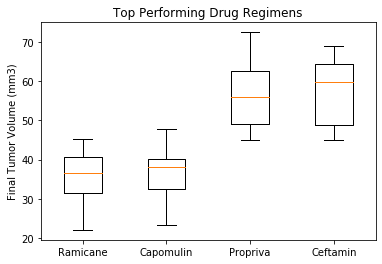

In [233]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Ramicane = a.loc[a["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
ram = list(Ramicane)

Capomulin = a.loc[a["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
cap = list(Capomulin)

Propriva = a.loc[a["Drug Regimen"] == "Propriva"]["Tumor Volume (mm3)"]
prop = list(Propriva)

Ceftamin = a.loc[a["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
ceft = list(Ceftamin)


info = [ram, cap, prop, ceft]
fig1, ax1 = plt.subplots()
ax1.set_title('Top Performing Drug Regimens')
ax1.set_ylabel("Final Tumor Volume (mm3)")
labels = ["Ramicane", "Capomulin", "Propriva", "Ceftamin"]
ax1.boxplot(info, labels=labels)
plt.show()

## Line and Scatter Plots

In [219]:
s185 = study_df.loc[study_df["Mouse ID"]=="s185"]
s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


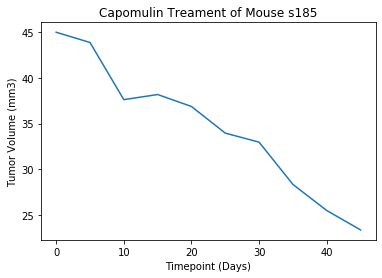

In [82]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axis = list(s185["Timepoint"])
y_axis = list(s185["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treament of Mouse s185")

plt.plot(x_axis, y_axis)
plt.show()

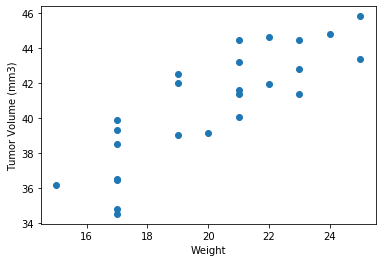

In [202]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin = study_df.loc[study_df["Drug Regimen"]=="Capomulin"]

cap_summary = Capomulin.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
cap_mice = Capomulin["Mouse ID"].unique()
Capomulin = Capomulin[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
cap2 = Capomulin.drop_duplicates("Mouse ID")

cap2 = cap2.sort_values(by='Mouse ID', ascending=True, na_position='first')
cap2["Average Volume"] = avg_volume
cap2

weight =list(cap2["Weight (g)"])
avg_volume = list(cap2["Average Volume"])

plt.scatter(weight,avg_volume)
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

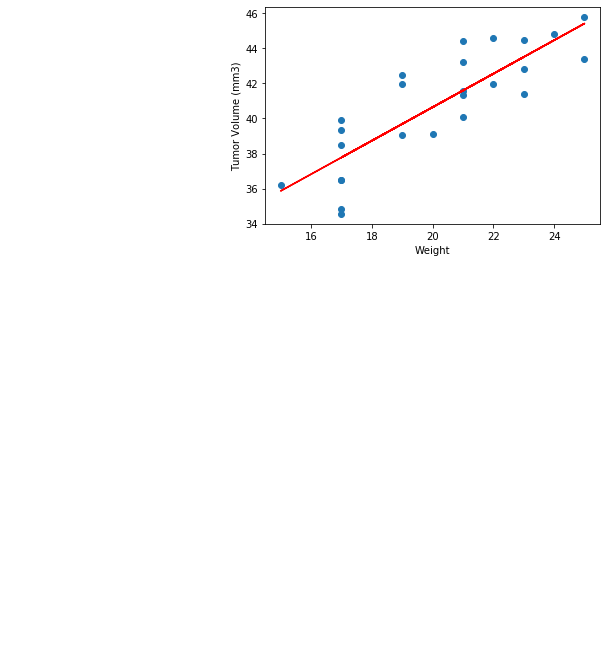

In [218]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight =cap2["Weight (g)"]
avg_volume = cap2["Average Volume"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, avg_volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()